In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Using TensorFlow backend.


Train on 2896 samples, validate on 725 samples
Epoch 1/20
2896/2896 [==============================] - 153s 53ms/step - loss: 0.6722 - accuracy: 0.5974 - val_loss: 0.5759 - val_accuracy: 0.6952
Epoch 2/20
2896/2896 [==============================] - 146s 50ms/step - loss: 0.5089 - accuracy: 0.7548 - val_loss: 0.4526 - val_accuracy: 0.7972
Epoch 3/20
2896/2896 [==============================] - 127s 44ms/step - loss: 0.4193 - accuracy: 0.8101 - val_loss: 0.4156 - val_accuracy: 0.8124
Epoch 4/20
2896/2896 [==============================] - 128s 44ms/step - loss: 0.3688 - accuracy: 0.8343 - val_loss: 0.4506 - val_accuracy: 0.7724
Epoch 5/20
2896/2896 [==============================] - 127s 44ms/step - loss: 0.3510 - accuracy: 0.8356 - val_loss: 0.3929 - val_accuracy: 0.8097
Epoch 6/20
2896/2896 [==============================] - 127s 44ms/step - loss: 0.2952 - accuracy: 0.8643 - val_loss: 0.3697 - val_accuracy: 0.8331
Epoch 7/20
2896/2896 [==============================] - 132s 46ms/step 

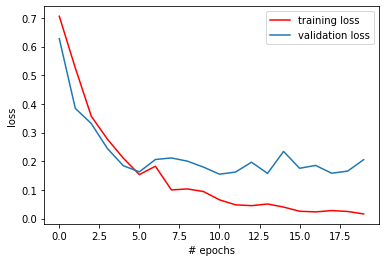

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

print(model.evaluate(test_data,test_target))